# 1. Anda bekerja sebagai seorang data scientist, atasan anda mengirimkan anda data kepada anda dan meminta untuk memberikan analisa dengan menggunakan :
- semua metode pada proses Exploratory Data Analysis. Lakukan proses Feature Engineering terlebih dahulu dan mengecek secara teliti pada tiap kolom data sembari melakukan data understanding. **(20 Poin)**

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load data
df = pd.read_csv('/content/ecommerce.csv')
data = df.copy()

# data -> for EDA process
# data di-copy dari df supaya dalam proses EDA hanya dilakukan pada 'data' tidak dengan 'df'
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


## Data Deskripsi
InvoiceNo : Nomor invoice pembelian barang<br>
StockCode : kode unik yang diberikan pada setiap produk<br>
Description : nama produk (produk yang dibeli)<br>
Quantity  : jumlah/kuantitas produk yang dibeli<br>
InvoiceDate : Tanggal invoice terbit<br>
UnitPrice : harga produk per unit<br>
CustomerID : ID pelanggan<br>
Country : kota pelanggan/pembeli<br>

## Preliminary

In [ ]:
# menampilkan 5 sample baris data
data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1922,569841,23533,WALL ART GARDEN HAVEN,3,10/6/2011 13:27,5.95,17428,United Kingdom
1051,549730,22908,PACK OF 20 NAPKINS RED APPLES,2,4/11/2011 16:35,0.85,15867,United Kingdom
3827,572658,21481,FAWN BLUE HOT WATER BOTTLE,4,10/25/2011 12:29,3.75,17690,United Kingdom
1196,575902,21240,BLUE POLKADOT CUP,8,11/11/2011 15:20,0.85,15544,United Kingdom
3581,557281,21158,MOODY GIRL DOOR HANGER,2,6/19/2011 12:23,1.45,13632,United Kingdom


1. kolom invoiceNo, CustomerID, UnitPrice dan Quantity merupakan data numerik; kolom StockCode, Description, dan Country merupakan data kategorik; sedangkan kolom InvoiceDate merupakan data date
2. kolom UnitPrice hanya memberi informasi harga per unit/per produk bukan jumlah harga untuk keseluruhan quantity yang dibeli pelanggan.
3. kolom InvoiceNo adalah nomor unik yang berbeda untuk setiap transaksi.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


1. Data memiliki 8 kolom dan 4870 baris
2. Semua tipe data tampaknya sesuai, mengingat sebelumnya sudah cek sample baris data, kecuali kolom InvoiceDate seharusnya type data date, akan diperbaiki kemudian
3. Tidak terdapat missing value

In [ ]:
# mengelompokkan berdasarkan data numerik atau data kategorik
numerik =['InvoiceNo', 'CustomerID', 'Quantity', 'UnitPrice']
kategorik = ['StockCode', 'Description', 'Country'] #InvoiceDate tidak dimasukkan karna seharusnya data date

In [ ]:
numerik_kolom = data.select_dtypes(include=['number']).columns
print("Kolom Numerik:")
print(numerik_kolom)

Kolom Numerik:
Index(['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID'], dtype='object')


In [ ]:
kategorik_kolom = data.select_dtypes(include=['object']).columns
print("Kolom Kategorik:")
print(kategorik_kolom)

Kolom Kategorik:
Index(['StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')


In [ ]:
data[numerik].describe()

,InvoiceNo,CustomerID,Quantity,UnitPrice
count,4870.000000,4870.000000,4870.000000,4870.000000
mean,560586.577413,15291.004312,12.945791,2.937057
std,13211.347819,1709.035002,38.145988,4.744515
min,536365.000000,12347.000000,1.000000,0.040000
25%,548861.000000,13975.000000,2.000000,1.250000
50%,561895.000000,15144.000000,5.000000,1.950000
75%,572126.000000,16793.250000,12.000000,3.750000
max,581585.000000,18283.000000,992.000000,145.000000


1. mengabaikan data InvoiceNo karna InvoiceNo biasanya merupakan identifikasi unik untuk setiap transaksi. Untuk sementara mengabaikan data customerID juga karna berisi numerik unik, kemungkinan akan dianalisis dari sisi frekuensi
2. Data Quantity dan UnitPrice nilai minimumnya masuk akal namun nilai maksimumnya sepertinya tidak masuk akal karna sangat jauh dari nilai persentil 75% nya, akan di cek lebih lanjut nanti apakah outliers yang masih masuk akal atau tidak
3. Data Quantity dan UnitPrice tidak berdistribusi normal(skewed) dilihat dari nilai mean dan 50% nya yang jauh berbeda

In [ ]:
data[kategorik].describe()

,StockCode,Description,Country
count,4870,4870,4870
unique,1773,1807,31
top,85099B,JUMBO BAG RED RETROSPOT,United Kingdom
freq,24,24,4346


1. Data StockCode memiliki nilai unik sebanyak 1773, dengan Code yang paling banyak dipakai yaitu 85099B sebanyak 24 kali
2. Data Description memiliki 1807 judul buku(produk yang dijual) dengan judul buku yang paling banyak terjual yaitu 'jumbo bag red retrospot' sebanyak 24 buah. Dari data ini juga terlihat bahwa code 85099B merupakan Stock code untuk produk dengan judul buku 'jumbo bag red retrospot'
3. Terdapat 31 negara asal pelanggan, dengan United kingdom sebagai negara terbanyak yang menjadi asal negara pelanggan yaitu sebanyak 4346 pelanggan. 30 negara lainnya terbagi-bagi untuk 524 pelanggan
4. Setiap unik value StockCode tidak merepresentasikan untuk 1 nama produk karna jumlah unik valuenya berbeda. Kemungkinan satu StockCode untuk Banyak Deskripsi/produk. Akan dianalisis lebih lanjut

In [ ]:
# cek data customerID
data.CustomerID.value_counts()

,count
CustomerID,
17841,112
14911,76
12748,65
14096,57
14606,55
...,...
13338,1
17712,1
17520,1


Terdapat id unik sebanyak 1932 id dari total transaksi 4870 kali. Customer id dengan frekuensi terbanyak yaitu id 17841 sebanyak 112 kali transaksi.

## Feature Engineering

### Duplicate Handling

In [ ]:
data.duplicated().sum()

np.int64(0)

tidak ada data duplicated

### Missing Value Handling

In [ ]:
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Tidak terdapat data null, namun akan mengecek kesesuaian data di beberapa kolom

In [ ]:
# cek kesesuaian isi data pada kolom description
pd.set_option('display.max_rows', None)
data.Description.value_counts()


,count
Description,
JUMBO BAG RED RETROSPOT,24
PARTY BUNTING,22
REGENCY CAKESTAND 3 TIER,21
WHITE HANGING HEART T-LIGHT HOLDER,19
60 TEATIME FAIRY CAKE CASES,18
SET OF 3 CAKE TINS PANTRY DESIGN,16
SET OF 4 PANTRY JELLY MOULDS,16
ASSORTED COLOUR BIRD ORNAMENT,15
JAM MAKING SET PRINTED,15


kesesuaian data sudah benar tidak ada missing value/data yang tidak sesuai

In [ ]:
# cek kesesuaian isi data pada kolom country
data.Country.value_counts()

,count
Country,
United Kingdom,4346
Germany,121
EIRE,90
France,89
Switzerland,28
Netherlands,26
Spain,25
Belgium,21
Portugal,16


Terdapat nama country yang tidak sesuai yaitu 'Unspecified' sebanyak 4 buah

In [ ]:
# persentase data unspecified
(data.Country == 'Unspecified').sum() / len(data.Country) * 100

np.float64(0.08213552361396304)

persentase data 'Unspecified' sangat kecil yaitu 0.08% karna dibawah 20% maka saya memutuskan untuk melakukan drop baris untuk data country unspecified tersebut.

In [ ]:
# drop data 'unspecified'
data = data[data.Country != 'Unspecified']

In [ ]:
# cek kembali value counts Country
data.Country.value_counts()

,count
Country,
United Kingdom,4346
Germany,121
EIRE,90
France,89
Switzerland,28
Netherlands,26
Spain,25
Belgium,21
Portugal,16


Data Country sudah bersih dari data yang tidak sesuai

### Outlier Handling

In [ ]:
import scipy.stats as stats

def check_plot(data, variable):
    '''
      fungsi mengambil kerangka data (df) dan
      variabel yang diminati sebagai argumen
    '''

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30, binwidth=(data[variable].max() - data[variable].min()) / 30, kde=False)
    plt.title('Histogram')
    plt.xlabel(variable)
    plt.ylabel('Frekuensi')

    # Boxplot dengan pengaturan lebar
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, y=variable, width=0.5)  # Menyesuaikan lebar boxplot
    plt.title('Boxplot')
    plt.ylabel(variable)

    # Tampilkan grafik
    plt.show()

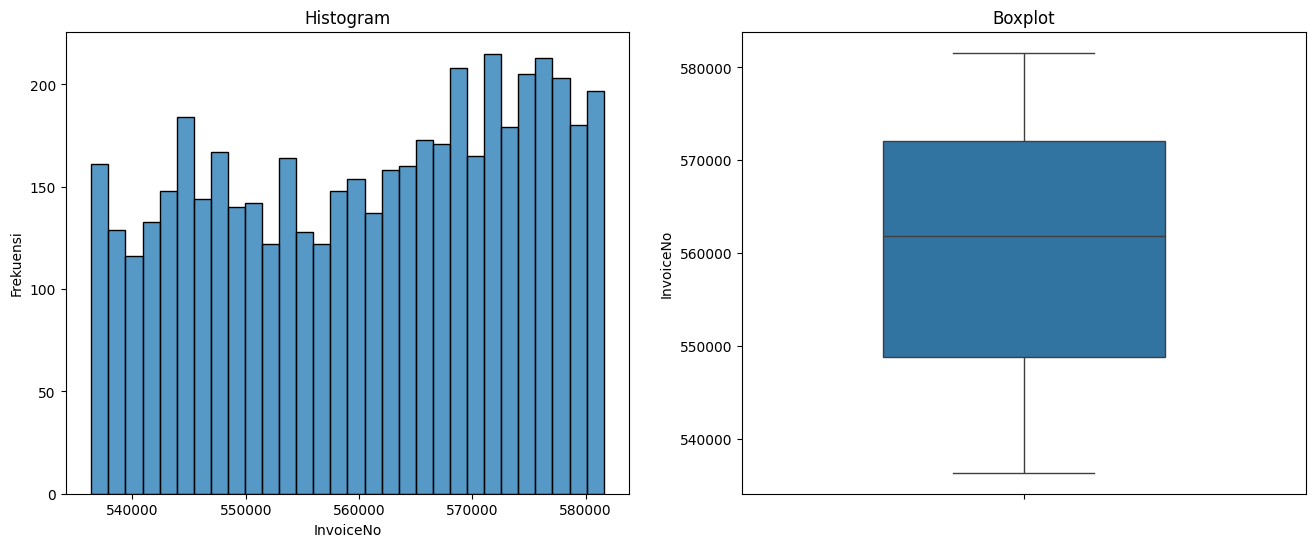

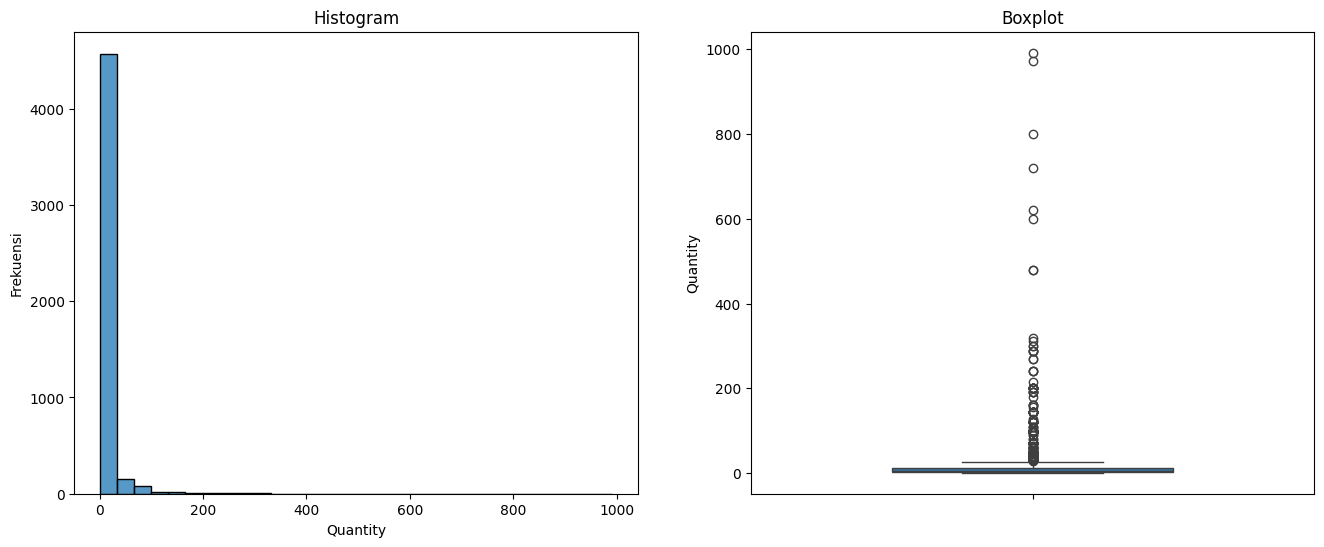

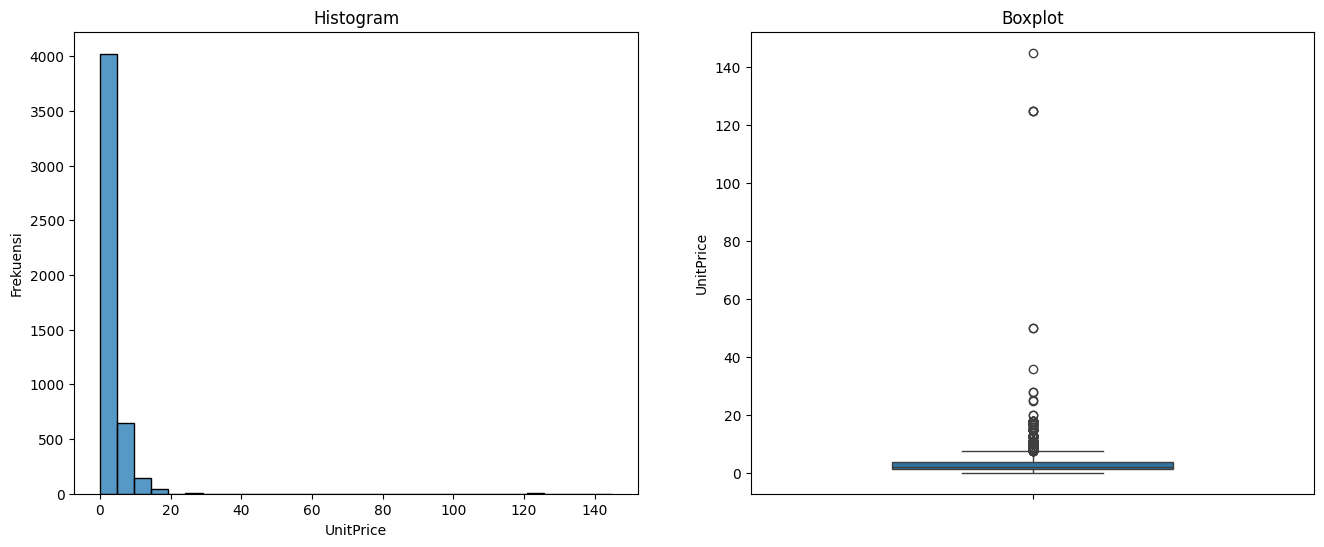

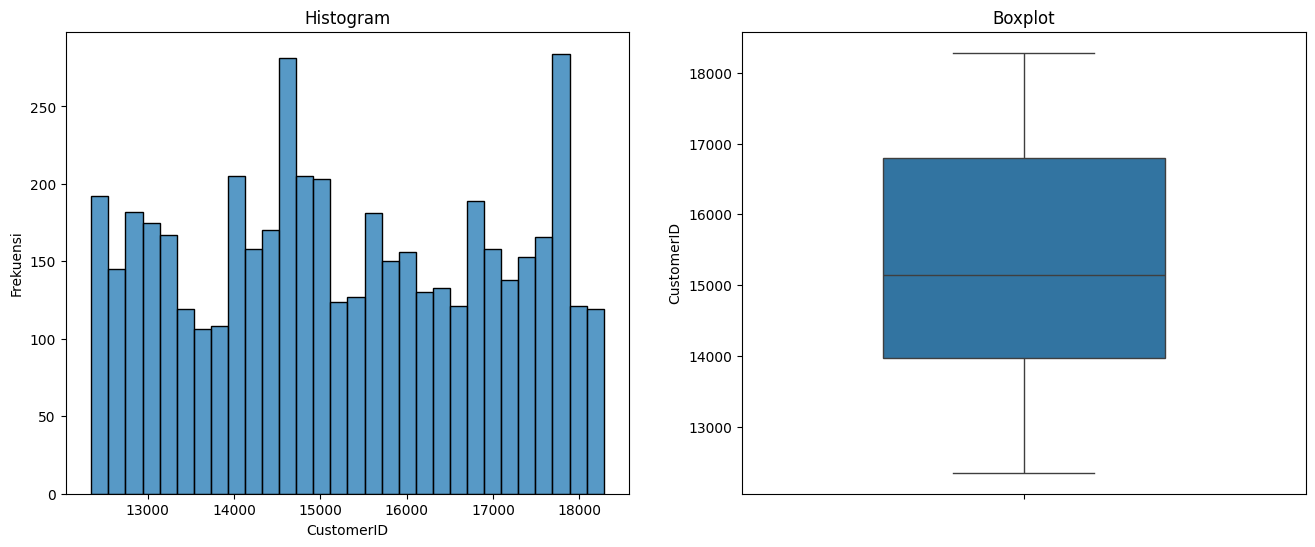

In [ ]:
# visualisasikan outlier hanya pada kolom numerik
numerik_kolom = data.select_dtypes(include=['number']).columns
for col in numerik_kolom:
    check_plot(data, col)

1. Data InvoiceNo dan CustomerID memiliki distribusi uniform karena datanya merupakan value unik yang angka nya saling berdekatan dan berurut
2. Data Quantity dan Unitprice pada boxplot terdapat banyak dugaan outliers terlihat dari titik titik diluar whiskers

In [ ]:
# Cek nilai lowerbound dan upperbound data UnitPrice
Q1 = data['UnitPrice'].quantile(0.25)
Q3 = data['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Nilai Lowerbound:", lower_bound)
print("Nilai Upperbound:", upper_bound)

Nilai Lowerbound: -2.5
Nilai Upperbound: 7.5


In [ ]:
# Cek data UnitPrice yang dibawah nilai Lowerbound dan diatas upperbound apakah masuk akal atau tidak
# Mengurutkan kolom UnitPrice dari terkecil hingga terbesar
sorted_unitprice = data.sort_values(by='UnitPrice', ascending=True)

# Menampilkan kolom UnitPrice dan Description
print(sorted_unitprice[['UnitPrice', 'Description']])

      UnitPrice                          Description
3533       0.04           POPART WOODEN PENCILS ASST
3554       0.12    POPART RECT PENCIL SHARPENER ASST
2497       0.12      DISCO BALL CHRISTMAS DECORATION
3911       0.12                  TOOTHPASTE TUBE PEN
940        0.12                   BLUE PUDDING SPOON
498        0.12      DISCO BALL CHRISTMAS DECORATION
4501       0.12      DISCO BALL CHRISTMAS DECORATION
3244       0.12      DISCO BALL CHRISTMAS DECORATION
3202       0.12  SMALL FOLDING SCISSOR(POINTED EDGE)
4860       0.12         HANGING WOOD AND FELT FLOWER
2360       0.16        LETTER SHAPE PENCIL SHARPENER
223        0.16                 SLEEPING CAT ERASERS
935        0.19       ASSORTED TUTTI FRUTTI BRACELET
4639       0.19                 GOLD PRINT PAPER BAG
1817       0.19       ROUND PURPLE CLOCK WITH SUCKER
2555       0.19      EASTER DECORATION HANGING BUNNY
1217       0.19             JAZZ HEARTS ADDRESS BOOK
3094       0.19        IVORY HANGING DECORATIO

1. Tidak ada harga barang dibawah lower bound UnitPrice artinya tidak ada outliers dibawah lowerbound.
2. UnitPrice rendah didominasi oleh barang-barang seperti pensil, pulpen, lilin, dan tisu yang masih masuk akal untuk harga sekelas barang-barang tersebut.
3. Terdapat barang-barang dengan harga diatas upperbound (7.50) seperti nesting box, jam dinding, black board, cake stand (harga diatas 10.00), faux fur chocolate throw/selimut bulu (19.95), kitchen cabinet (125.00), dan RUSTIC  SEVENTEEN DRAWER SIDEBOARD sejenis lemari kayu vintage (145.00) harga tersebut masih sangat masuk akal sesuai dengan barang-barangnya. Sehingga menurut saya dugaan outliers yang sebelumnya dilihat dari boxplot itu nilai yang masih sangat masuk akal.
4. Saya tidak akan menghapus data dugaan outliers tersebut.

In [ ]:
# Cek nilai lowerbound dan upperbound data Quantity
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Nilai Lowerbound:", lower_bound)
print("Nilai Upperbound:", upper_bound)

Nilai Lowerbound: -13.0
Nilai Upperbound: 27.0


In [ ]:
filtered_books = df[df['Quantity'] >=27.0]

# Menampilkan kolom UnitPrice dan Description
filtered_books_sorted = filtered_books[['Quantity', 'Description','UnitPrice']].sort_values(by='Quantity', ascending=False)
print(filtered_books_sorted)

      Quantity                          Description  UnitPrice
1863       992   WHITE HANGING HEART T-LIGHT HOLDER       3.20
4580       972              CREAM HEART CARD HOLDER       2.31
2400       800         WRAP, BILLBOARD FONTS DESIGN       0.34
3799       720        MIRROR MOSAIC T-LIGHT HOLDER        0.39
618        620                SWEETHEART BIRD HOUSE       3.30
971        600            ASSORTED COLOURS SILK FAN       0.72
2948       480   PACK OF 60 PINK PAISLEY CAKE CASES       0.55
4353       480             BLACK RECORD COVER FRAME       3.39
2044       320               PAPER CHAIN KIT EMPIRE       2.55
2028       312      HOT WATER BOTTLE I AM SO POORLY       4.25
2672       300                       JUMBO BAG OWLS       1.79
1551       300                   JUMBO BAG ALPHABET       1.79
792        288                               Manual       1.50
2985       288     HANGING CHICK  YELLOW DECORATION       1.25
2588       288   VINTAGE HEADS AND TAILS CARD GAME     

1. Dari data dugaan outliers pada data Quantity, terdapat quantity pembelian sebanyak 992 untuk barang WHITE HANGING HEART T-LIGHT HOLDER ini sangat memungkinkan terjadi. Jumlah besar ini bisa mewakili pembelian grosir (untuk dijual kembali) serupa dengan dugaan barang-barang(description) lainnya yang dibeli dalam quantity yang besar.
2. Barang-barang yang dibeli dengan quantity besar memiliki harga yang cenderung rendah(<4.00), jadi sangat memungkinkan untuk dibeli dalam jumlah banyak. Kecuali ada 3 barang yaitu WOODEN ADVENT CALENDAR RED(12.75), CHEST OF DRAWERS GINGHAM HEART(16.95),  dan REGENCY CAKESTAND 3 TIER (10.95) yang quantity nya berkisar 28-39. Barang-barang ini juga sangat mungkin dan masuk akal dibeli dalam jumlah seperti itu, bisa jadi mewakili para kontraktor perumahan, store furniture, toko kue dengan banyak cabang yang membutuhkan cakestand, atau para distributor barang-barang tersebut.
3. Dugaan outliers pada data quantity masih masuk akal/relevan sehingga saya memutuskan untuk mempertahankan data tersebut.

### Transformasi Data

Transformasi data yang digunakan adalah Log transformation karena data yang kita miliki memiliki rentang nilai yang sangat besar atau data dengan distribusi yang tidak normal. Tujuan penggunaan log transformation ini untuk membantu memperbaiki representasi visual datanya saja.

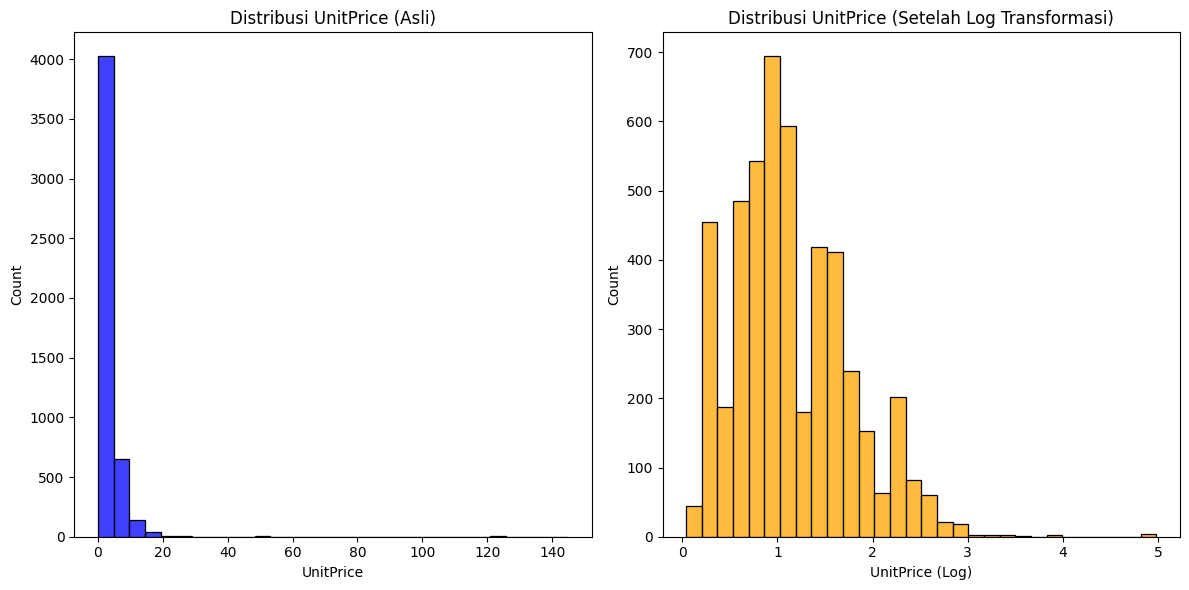

In [ ]:
# handling outliers UnitPrice dengan log transformation
# Mengurangi dampak nilai ekstrem pada visualisasi
data['UnitPrice_Log'] = np.log1p(data['UnitPrice'])
# Histogram sebelum transformasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['UnitPrice'], bins=30, kde=False, color='blue')
plt.title('Distribusi UnitPrice (Asli)')
plt.xlabel('UnitPrice')

# Histogram setelah log transformasi
plt.subplot(1, 2, 2)
sns.histplot(data['UnitPrice_Log'], bins=30, kde=False, color='orange')
plt.title('Distribusi UnitPrice (Setelah Log Transformasi)')
plt.xlabel('UnitPrice (Log)')
plt.tight_layout()
plt.show()

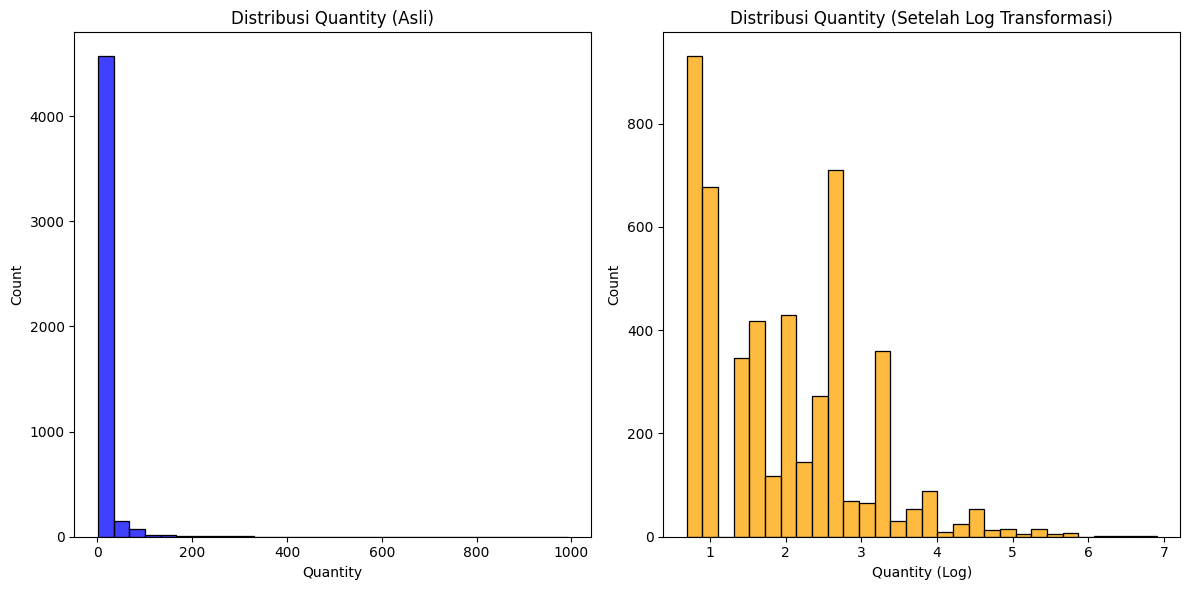

In [ ]:
# handling outliers Quantity dengan log transformation
# Mengurangi dampak nilai ekstrem pada visualisasi
data['Quantity_Log'] = np.log1p(data['Quantity'])
# Histogram sebelum transformasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Quantity'], bins=30, kde=False, color='blue')
plt.title('Distribusi Quantity (Asli)')
plt.xlabel('Quantity')

# Histogram setelah log transformasi
plt.subplot(1, 2, 2)
sns.histplot(data['Quantity_Log'], bins=30, kde=False, color='orange')
plt.title('Distribusi Quantity (Setelah Log Transformasi)')
plt.xlabel('Quantity (Log)')
plt.tight_layout()
plt.show()

setelah dilakukan transformasi data Nilai besar dikompresi sehingga jarak antar nilai menjadi lebih kecil.<br>
Distribusi data berubah, untuk mengurangi pengaruh nilai ekstrem.


# 2. Setelah melakukan feature engineering, Ikuti anjuran berikut :
- Buat 5 pertanyaan analisa
- jawab dengan pendekatan metode data manipulation (sorting, filtering, group by, pivot, melt, crosstab, working with datetime, dsb (sesuaikan dengan keperluan anda
- Buatlah visualisasi grafik supaya mempermudah dalam ekstraksi insight setelah menjawab menggunakan metode data manipulation diatas
- Tulis insight anda

`poin` :
- insight / observation : **10 poin (1 pertanyaan 2 poin)**
- pertanyaan analisis dan jawaban metode data manipulation : **30 poin (1 pertanyaan 7 poin)**
- data visualisasi : **30 poin (1 visualisasi dari 1 pertanyaan 7 poin)**

5 Pertanyaan analisa:
1. Produk apa yang paling banyak dibeli oleh pelanggan dari United Kingdom? (10 produk paling banyak dibeli)
2. Kapan waktu yang paling banyak terjadi transaksi?
3. StockCode mana saja yang merepresentasikan lebih dari 1 produk (description)?
4. Bagaimana distribusi invoice setiap bulan?
5. Bagaimana Jumlah Pelanggan unik untuk setiap negara?
6. Bagaimana total penjualan (total price) per bulan di tahun 2011 di setiap negara?



### Filtering

1. Produk apa yang paling banyak dibeli oleh pelanggan dari United Kingdom? (10 produk paling banyak dibeli)

In [ ]:
data_filtered = data[data['Country'] == 'United Kingdom']
data_filtered.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_Log,Quantity_Log
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom,1.124930,0.693147
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom,1.266948,1.098612
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom,0.974560,0.693147
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom,0.810930,2.564949
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom,0.615186,1.386294


In [ ]:
data_filtered.Description.nunique()

1728

In [ ]:
# hitung jumlah quantity per description dan diurutkan dari besar ke kecil
desc_counts = data_filtered[['Description','Quantity']].sort_values(by=['Quantity'], ascending=False).reset_index().head(10)
desc_counts

,index,Description,Quantity
0,1863,WHITE HANGING HEART T-LIGHT HOLDER,992
1,4580,CREAM HEART CARD HOLDER,972
2,2400,"WRAP, BILLBOARD FONTS DESIGN",800
3,3799,MIRROR MOSAIC T-LIGHT HOLDER,720
4,618,SWEETHEART BIRD HOUSE,620
5,971,ASSORTED COLOURS SILK FAN,600
6,4353,BLACK RECORD COVER FRAME,480
7,2044,PAPER CHAIN KIT EMPIRE,320
8,2028,HOT WATER BOTTLE I AM SO POORLY,312
9,2672,JUMBO BAG OWLS,300


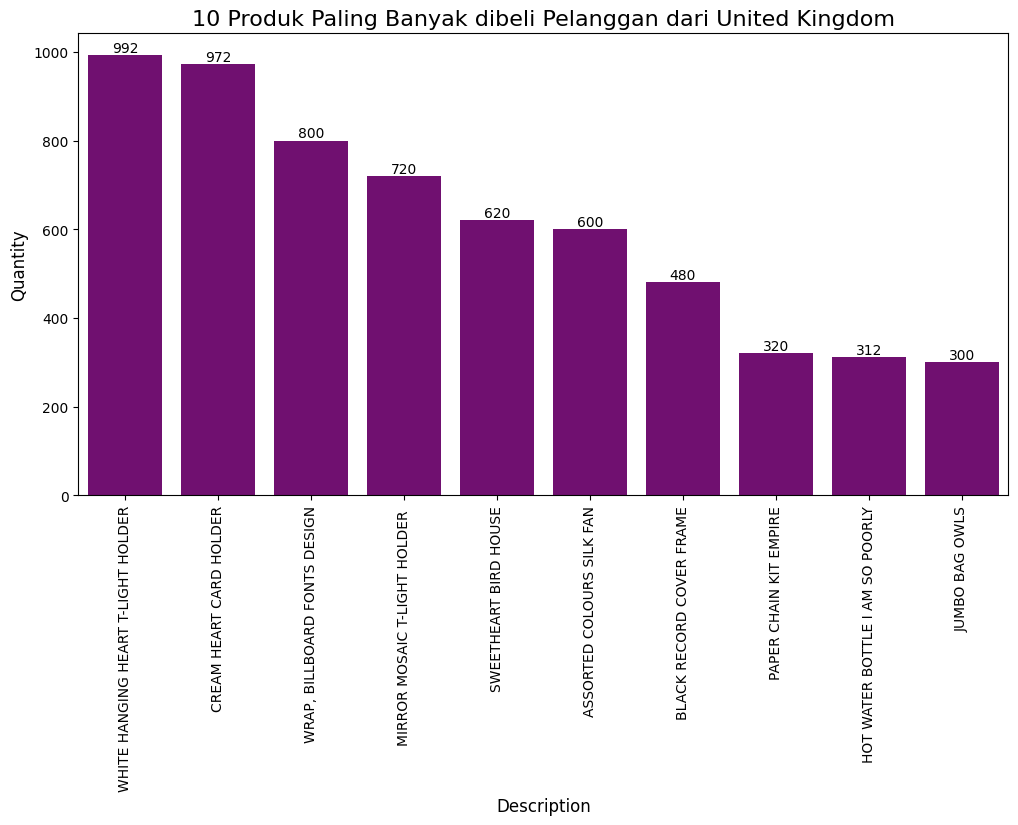

In [ ]:
# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=desc_counts, x='Description', y='Quantity', color='purple')

# tambahkan label angka di atas bar
for i in ax.containers:
    ax.bar_label(i, fmt='%d')

plt.title('10 Produk Paling Banyak dibeli Pelanggan dari United Kingdom', fontsize=16)
plt.xlabel('Description', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=90)

plt.show()


Dari total 1805 jenis barang yang ada di e-commerce, 1728 jenis barang (description) pernah dibeli oleh pelanggan dari United Kingdom. Berikut 10 barang yang paling banyak dibeli oleh pelanggan dari United Kingdom:
1. WHITE HANGING HEART T-LIGHT HOLDER	(992)
2. CREAM HEART CARD HOLDER	(972)
3. WRAP, BILLBOARD FONTS DESIGN	(800)
4. MIRROR MOSAIC T-LIGHT HOLDER	(720)
5. SWEETHEART BIRD HOUSE	(620)
6. ASSORTED COLOURS SILK FAN	(600)
7. BLACK RECORD COVER FRAME	(480)
8. PAPER CHAIN KIT EMPIRE	(320)
9. HOT WATER BOTTLE I AM SO POORLY	(312)
10. JUMBO BAG OWLS	(300)

### Working With Datetime

2. Kapan waktu yang paling banyak terjadi transaksi?

In [ ]:
# ubah type data menjadi datetime
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4866 entries, 0 to 4869
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      4866 non-null   int64         
 1   StockCode      4866 non-null   object        
 2   Description    4866 non-null   object        
 3   Quantity       4866 non-null   int64         
 4   InvoiceDate    4866 non-null   datetime64[ns]
 5   UnitPrice      4866 non-null   float64       
 6   CustomerID     4866 non-null   int64         
 7   Country        4866 non-null   object        
 8   UnitPrice_Log  4866 non-null   float64       
 9   Quantity_Log   4866 non-null   float64       
 10  Total_Price    4866 non-null   float64       
 11  Time_Invoice   4866 non-null   object        
 12  encoding_time  4866 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 499.2+ KB


In [ ]:
# Menambahkan kolom encoding_time berdasarkan jam
data['encoding_time'] = pd.cut(data['InvoiceDate'].dt.hour,
                               bins=[0, 10, 15, 19, 24],
                               labels=['Pagi', 'Siang', 'Sore', 'Malam'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,UnitPrice_Log,Quantity_Log,Total_Price,Time_Invoice,encoding_time
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,1.124930,0.693147,2.08,17:31:00,Sore
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,1.266948,1.098612,5.10,11:58:00,Siang
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,0.974560,0.693147,1.65,12:54:00,Siang
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,0.810930,2.564949,15.00,11:34:00,Siang
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,0.615186,1.386294,2.55,12:23:00,Siang


In [ ]:
# melihat jumlah setiap value yang sudah di encoding
waktu_transaksi = data.encoding_time.value_counts()
waktu_transaksi

,count
encoding_time,
Siang,3507
Pagi,834
Sore,514
Malam,11


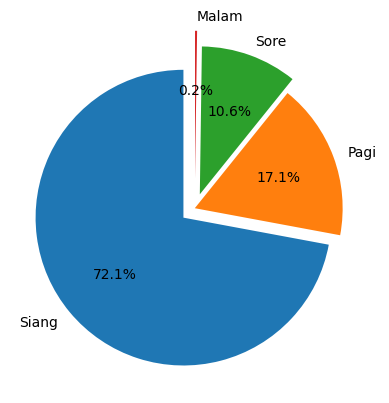

In [ ]:
# visualisasi pie chart
fig, ax = plt.subplots()
explode = (0.1, 0, 0.1, 0.2)
ax.pie(waktu_transaksi.values, labels=waktu_transaksi.index,
      startangle=90, autopct='%1.1f%%', explode=explode)
plt.show()

1. Waktu yang paling banyak terjadi transaksi adalah pada siang hari diantara jam 11.00-15.00 sebanyak 72.1% dari total keseluruhan transaksi. Sedangkan waktu yang paling sedikit terjadi transaksi adalah malam hari hanya sekitar 0.2% diantara jam 19.00-24.00
2. Dari informasi ini, bisa melihat bagaimana perilaku konsumen. Bisa jadi peningkatan transaksi di siang hari dikarenakan siang hari merupakan puncak aktivitas manusia sehingga orang-orang banyak mengingat barang-barang yang dibutuhkan dan melakukan transaksi, bisa juga karena rehat sejenak dari suntuknya pekerjaan kemudian mencari selingan hiburan lewat aplikasi ecommerce dan berujung transaksi. Pada malam hari, orang-orang cenderung menggunakan waktu untuk istirahat dan berkumpul bersama keluarga sehingga intensitas untuk membuka ecommerce sedikit.
3. Untuk meningkatkan transaksi di waktu-waktu yang lain mungkin bisa menggunakan promo prime hour, misal di jam 7.00 terdapat cashback 20% untuk setiap transaksi yang dilakukan pada jam tersebut sehingga nantinya bisa meningkatkan transaksi dan penjualan di waktu pagi hari.
4. Dari informasi ini juga ada indikasi bahwa produk-produk yang banyak dibeli pelanggan United Kingdom (pertanyaan no 1), terjual di siang hari.

### Group by

3. StockCode mana saja yang merepresentasikan lebih dari 1 barang(description)?

In [ ]:
stockcode_more_than_1_items = data.groupby('StockCode')['Description'].nunique()

# Menyaring StockCode yang memiliki lebih dari 1 barang unik(description)
stockcode_more_than_1_items = stockcode_more_than_1_items[stockcode_more_than_1_items > 1]
stockcode_more_than_1_items.sort_values(ascending=False)

,Description
StockCode,
23209,3
23236,3
21175,2
21232,2
22197,2
22383,2
21507,2
21818,2
22804,2


In [ ]:
# Melihat nama-nama produk yang unik untuk setiap StockCode
stockcode_product_names = data.groupby('StockCode')['Description'].unique()

# Menampilkan StockCode yang memiliki lebih dari 1 barang(description), dan nama barang terkait
for stockcode in stockcode_more_than_1_items.index:
    print(f"StockCode: {stockcode} - Produk: {', '.join(stockcode_product_names[stockcode])}")


StockCode: 21175 - Produk: GIN + TONIC DIET METAL SIGN, GIN AND TONIC DIET METAL SIGN
StockCode: 21232 - Produk: STRAWBERRY CERAMIC TRINKET BOX, STRAWBERRY CERAMIC TRINKET POT
StockCode: 21507 - Produk: ELEPHANT, BIRTHDAY CARD, , ELEPHANT BIRTHDAY CARD 
StockCode: 21818 - Produk: GLITTER CHRISTMAS HEART , GLITTER HEART DECORATION
StockCode: 22197 - Produk: SMALL POPCORN HOLDER, POPCORN HOLDER
StockCode: 22383 - Produk: LUNCH BAG SUKI DESIGN , LUNCH BAG SUKI  DESIGN 
StockCode: 22584 - Produk: PACK OF 6 PANNETONE GIFT BOXES, PACK OF 6 PANETTONE GIFT BOXES
StockCode: 22776 - Produk: SWEETHEART 3 TIER CAKE STAND , SWEETHEART CAKESTAND 3 TIER
StockCode: 22804 - Produk: CANDLEHOLDER PINK HANGING HEART, PINK HANGING HEART T-LIGHT HOLDER
StockCode: 22900 - Produk: SET 2 TEA TOWELS I LOVE LONDON ,  SET 2 TEA TOWELS I LOVE LONDON 
StockCode: 22949 - Produk: 36 DOILIES DOLLY GIRL, SET OF 36 DOLLY GIRL PAPER DOILIES
StockCode: 22999 - Produk: TRAVEL CARD WALLET VINTAGE LEAF, TRAVEL CARD WALLET RE

In [ ]:
stockcode_counts = stockcode_more_than_1_items.value_counts().sort_index()
stockcode_counts

,count
Description,
2,30
3,2


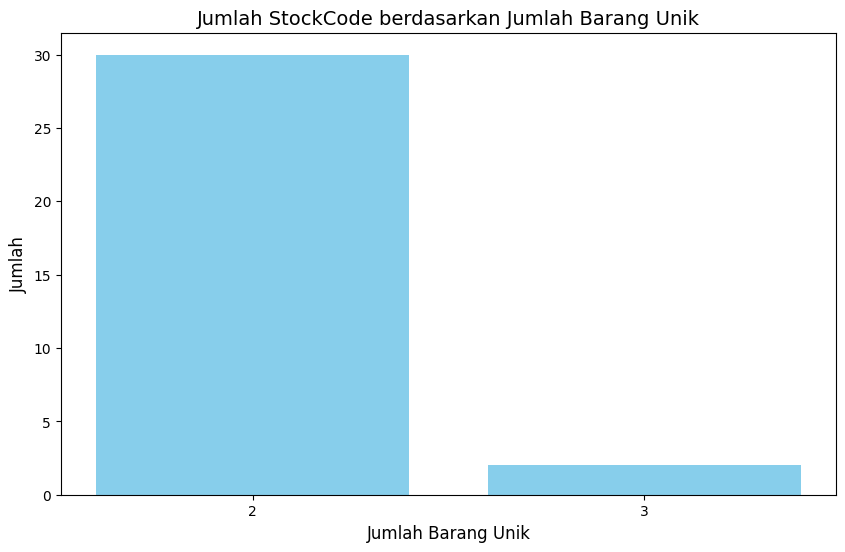

In [ ]:
# visualisasi bar chart
lt.figure(figsize=(10, 6))
plt.bar(stockcode_counts.index, stockcode_counts.values, color='skyblue')
plt.title('Jumlah StockCode berdasarkan Jumlah Barang Unik', fontsize=14)
plt.xlabel('Jumlah Barang Unik', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(stockcode_counts.index)  # Menampilkan setiap kategori jumlah barang unik pada sumbu X
plt.show()

1. Terdapat 32 stockCode yang merepresentasikan lebih dari 1 barang, 30 stockCode merepresentasikan 2 barang dan 2 lainnya merepresentasikan 3 barang.
2. kebanyak stockCode tersebut sebenarnya merujuk pada barang yang sama tapi descriptionnya ada perbedaan sedikit seperti penggunaan tanda '+' dan 'and', ada perbedaan/kelebihan spasi, penggunaan huruf vokal yang berbeda seperti 'i' dan'y', penggunaan jamak dan tunggal seperti 'leaf' dan 'leaves'.
3. Namun ada juga beberapa stockCode yang sepertinya tidak merujuk pada 2 atau 3 fisik barang yang sama, seperti StockCode: 22999 - Produk: TRAVEL CARD WALLET VINTAGE LEAF, TRAVEL CARD WALLET RETRO PETALS. StockCode 22999 apakah merujuk pada fisik yang benar-benar sama atau malah berbeda model. contoh lainnya StockCode: 22197 - Produk: SMALL POPCORN HOLDER, POPCORN HOLDER, stockcode tersebut apakah merujuk pada ukuran yang berbeda (small dan tidak small) atau fisik ukuran barangnya sama. Ini mungkin harus dikonfirmasi ke pembuat stockcode atau orang di warehouse atau manajemen inventaris
4. Apabila stockcode tidak benar-benar merujuk pada description 2 atau 3 barang yang sama persis, maka seharusnya dibuatkan stockcode baru sehingga StockCode seharusnya mewakili satu jenis barang saja. Apabila tidak dilakukan, bisa membingungkan saat melakukan analisis inventaris atau saat tracking penjualan dan juga stok barang bisa tumpang tindih atau sulit untuk dipantau dengan akurat.

4. Bagaimana distribusi invoice per bulan (tahun 2011)?

In [ ]:
# memisahkan tanggal, bulan, dan waktu ke kolom yang berbeda-beda
data['Date_Invoice'] = data.InvoiceDate.dt.date
data['Year_Invoice'] = data.InvoiceDate.dt.year
data['Month_Invoice'] = data.InvoiceDate.dt.month
pd.set_option('display.max_column', None)

# Filter data untuk tahun 2011
data_2011 = data[data['Year_Invoice'] == 2011]

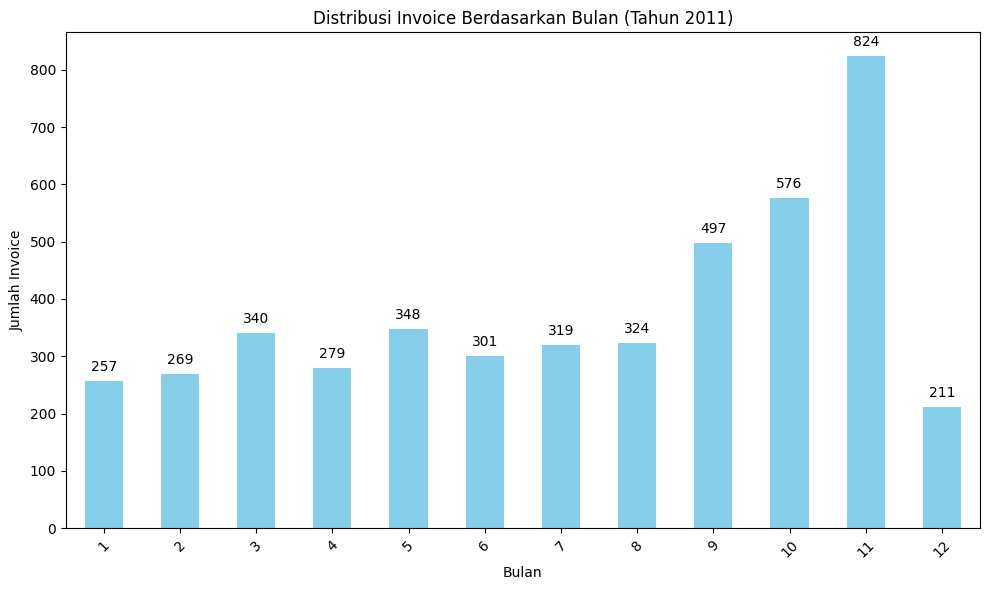

In [ ]:
# Menghitung jumlah invoice per bulan
invoice_per_month = data_2011.groupby('Month_Invoice').size()

# visualisasi bar plot
fig, ax = plt.subplots(figsize=(10, 6))
invoice_per_month.plot(kind='bar', color='skyblue', ax=ax)

# Menambahkan keterangan jumlah di atas setiap bar
ax.bar_label(ax.containers[0], label_type='edge', padding=5)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Invoice Berdasarkan Bulan (Tahun 2011)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Invoice')

# Memutar label pada sumbu x a
plt.xticks(rotation=45)

plt.tight_layout()
# Menampilkan grafik
plt.show()

1. Distribusi invoice tahun 2011 paling banyak pada bulan 11 yaitu November sebanyak 824 invoice dan paling sedikit pada bulan Desember.
2. Distribusi invoice paling anjlok terjadi dari bulan november ke desember yang berarti kegiatan transaksi di ecommerce turun drastis.
3. Bulan januari ke Februari dan bulan Juli ke Agustus mengalami kenaikan  sangat sedikit sekali yaitu tidak lebih dari 13 invoice.
4. Banyaknya jumlah invoice ini tidak merepresentasikan Total_Price atau total penjualan setiap bulannya karena bisa saja invoice nya banyak namun secara total price di setiap invoicenya kecil.

### Crosstab

5. Bagaimana Jumlah Pelanggan unik untuk setiap negara?

Country
United Kingdom          1735
Germany                   49
France                    43
Spain                     12
Switzerland               12
Belgium                   11
Portugal                   8
Finland                    5
Sweden                     5
Norway                     5
Greece                     4
Channel Islands            4
Cyprus                     4
Australia                  4
Austria                    4
Italy                      4
Denmark                    3
Unspecified                3
Netherlands                3
EIRE                       3
Japan                      2
Israel                     2
Canada                     1
Iceland                    1
Brazil                     1
Lebanon                    1
Malta                      1
Poland                     1
Singapore                  1
RSA                        1
United Arab Emirates       1
dtype: int64


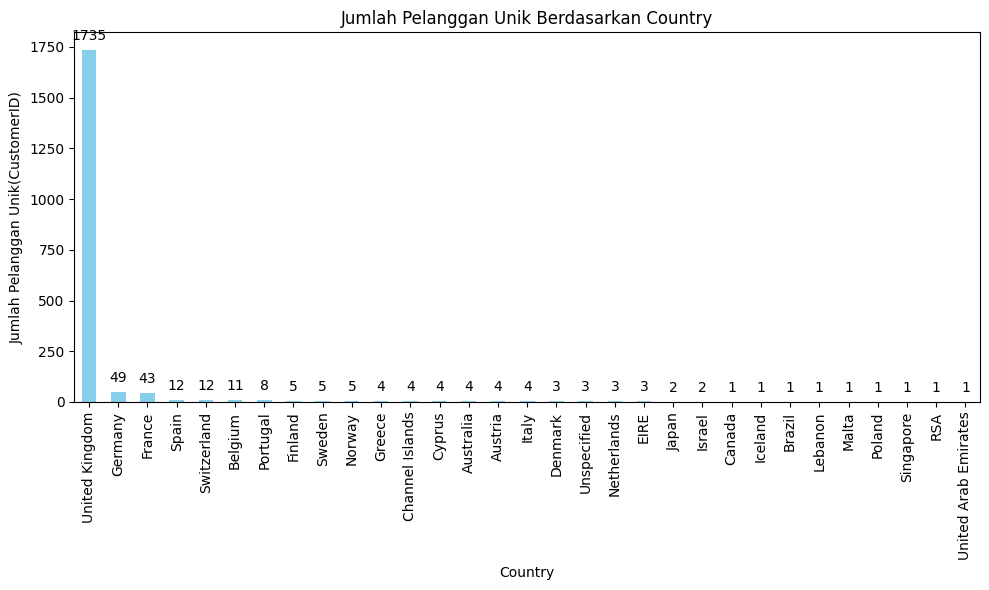

In [ ]:
# Menggunakan crosstab untuk menghitung jumlah pelanggan unik per negara
unique_customers_per_country = pd.crosstab(df['Country'], df['CustomerID'])

# Menjumlahkan jumlah pelanggan unik di setiap negara
unique_customers_per_country = unique_customers_per_country.gt(0).sum(axis=1).sort_values(ascending=False)

# Menampilkan hasil
print(unique_customers_per_country)

# visualisasi bar plot
fig, ax = plt.subplots(figsize=(10, 6))
unique_customers_per_country.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Menambahkan keterangan jumlah di atas setiap bar
ax.bar_label(ax.containers[0], label_type='edge', padding=5)

plt.title('Jumlah Pelanggan Unik Berdasarkan Country')
plt.xlabel('Country')
plt.ylabel('Jumlah Pelanggan Unik(CustomerID)')
plt.tight_layout()

# Menampilkan grafik
plt.show()

1. Pelanggan unik paling banyak diduduki oleh United kingdom, posisi ke-2 Germany, posisi ke-3 France, posisi ke-4 spain dan switzerland, posisi ke-5 Belgium, dan posisi ke-6 Portugal.
2. Terdapat 3 negara yang memiliki pelanggan unik 5, 6 negara yang memiliki pelanggan unik 4, 4 negara dengan pelanggan unik 3, 2 negara dengan pelanggan unik 2, dan 9 negara dengan pelanggan unik hanya 1.
3. Negara-negara yang memiliki pelanggan unik sedikit bisa dijadikan prospek kedepannya, mungkin dengan ads/iklan yang menjangkau wilayah-wilayah tersebut.

### Pivot

6. Bagaimana total penjualan (total price) per bulan di tahun 2011 di setiap negara?

In [ ]:
pd.set_option('display.max_column', None)

# Membuat pivot table untuk total harga per bulan di setiap negara
tabel_pivot = pd.pivot_table(data_2011, values='Total_Price', index='Month_Invoice', columns='Country', aggfunc='sum', fill_value=0)

tabel_pivot

Country,Australia,Austria,Belgium,Brazil,Canada,Channel Islands,Cyprus,Denmark,EIRE,Finland,France,Germany,Greece,Israel,Italy,Japan,Lebanon,Malta,Netherlands,Norway,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,United Arab Emirates,United Kingdom
Month_Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,27.00,0.00,0.00,0.0,0.00,19.8,0.00,0.00,87.60,244.08,202.21,209.50,83.4,0.00,0.00,0.0,47.4,0.0,208.32,0.00,0.0,85.80,0.0,38.4,126.15,75.60,20.10,0.0,4772.16
2,0.00,0.00,20.16,0.0,0.00,0.0,70.55,0.00,251.17,0.00,102.42,213.15,0.0,8.50,0.00,187.2,0.0,0.0,360.00,0.00,0.0,0.00,0.0,0.0,76.90,0.00,108.62,41.1,4712.69
3,564.00,0.00,8.50,0.0,0.00,71.1,0.00,0.00,94.29,122.04,160.26,431.82,12.5,0.00,38.40,0.0,0.0,0.0,105.00,0.00,0.0,0.00,0.0,0.0,0.00,264.00,156.60,0.0,5134.13
4,0.00,0.00,16.50,16.5,0.00,0.0,0.00,0.00,60.60,0.00,30.60,356.75,45.2,0.00,0.00,0.0,0.0,0.0,90.00,0.00,0.0,35.40,0.0,41.6,19.90,15.30,39.60,0.0,5589.68
5,66.48,9.96,19.80,0.0,0.00,0.0,0.00,0.00,136.50,0.00,68.10,171.45,0.0,0.00,26.85,0.0,0.0,0.0,365.60,0.00,15.8,4.95,0.0,0.0,0.00,0.00,20.80,0.0,6080.95
6,126.72,0.00,116.18,0.0,20.58,17.0,47.70,40.68,92.90,0.00,549.90,290.92,0.0,0.00,0.00,0.0,0.0,0.0,855.75,15.00,0.0,0.00,0.0,0.0,0.00,20.40,0.00,0.0,4993.20
7,44.40,86.40,63.90,0.0,0.00,0.0,0.00,0.00,968.30,24.90,343.60,171.22,0.0,0.00,0.00,0.0,0.0,0.0,0.00,15.90,0.0,16.50,0.0,0.0,5.04,17.34,82.00,0.0,5721.22
8,91.80,13.60,19.50,0.0,0.00,18.0,0.00,10.50,115.72,0.00,60.90,237.89,0.0,0.00,12.75,0.0,0.0,31.9,697.00,32.00,0.0,0.00,0.0,0.0,48.85,40.00,177.38,0.0,8277.62
9,16.60,0.00,16.60,0.0,0.00,11.5,0.00,0.00,110.86,0.00,265.65,224.98,0.0,0.00,0.00,20.4,0.0,0.0,580.00,30.00,10.2,12.50,0.0,0.0,80.10,17.00,0.00,0.0,8364.72


Ada beberapa visualisasi untuk menjelaskan insight dari tabel pivot diatas.

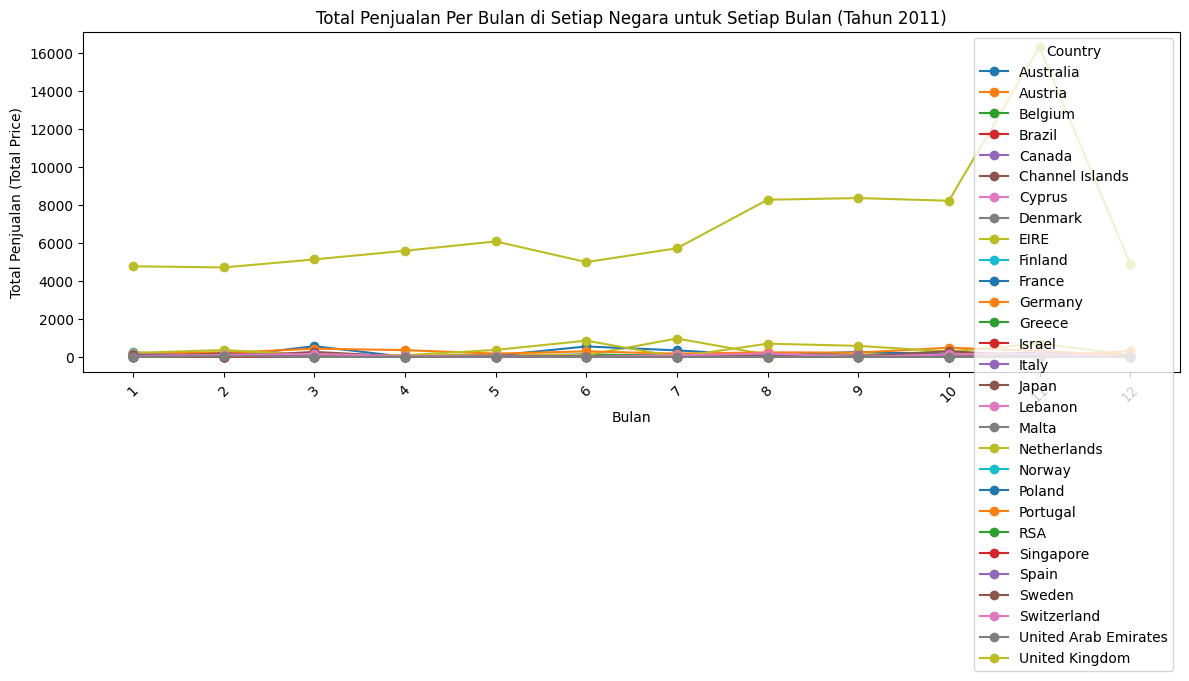

In [ ]:
# Visualisasi
plt.figure(figsize=(12, 6))

# Menggunakan loop untuk menggambar grafik untuk setiap Country
for country in tabel_pivot.columns:
    plt.plot(tabel_pivot.index, tabel_pivot[country], label=country, marker='o')

# Menambahkan label dan judul
plt.title('Total Penjualan Per Bulan di Setiap Negara untuk Setiap Bulan (Tahun 2011)')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (Total Price)')
plt.xticks(tabel_pivot.index, rotation=45)
plt.legend(title='Country')

# Menampilkan plot
plt.tight_layout()
plt.show()


1. Secara keseluruhan total penjualan per bulan paling banyak adalah dari negara United Kingdom, dilihat dari garis yang selalu berada diatas dibanding garis negara lain, negara-negara lainnya jauh dibawah UK,
2. Dari grafik ini terlihat ada negara-negara yang tidak memiliki total penjualan di bulan-bulan tertentu artinya negara-negara tersebut tidak setiap bulan ada riwayat transaksi.


In [ ]:
# Melihat negara yang memiliki transaksi di setiap bulan
# Negara yang memiliki transaksi di setiap bulan harus memiliki nilai > 0 di setiap bulan
negara_komplit = tabel_pivot.columns[tabel_pivot.gt(0).all(axis=0)]

# Memisahkan tabel pivot dengan negara yang memiliki transaksi di setiap bulan
tabel_pivot_komplit = tabel_pivot[negara_komplit]

# Menampilkan pivot tabel untuk negara yang memiliki transaksi di setiap bulan
print(tabel_pivot_komplit)



Country          EIRE  France  Germany  United Kingdom
Month_Invoice                                         
1               87.60  202.21   209.50         4772.16
2              251.17  102.42   213.15         4712.69
3               94.29  160.26   431.82         5134.13
4               60.60   30.60   356.75         5589.68
5              136.50   68.10   171.45         6080.95
6               92.90  549.90   290.92         4993.20
7              968.30  343.60   171.22         5721.22
8              115.72   60.90   237.89         8277.62
9              110.86  265.65   224.98         8364.72
10             281.90  131.74   481.75         8224.62
11             701.44  220.35   320.02        16319.30
12              96.50   86.52    53.86         4896.08


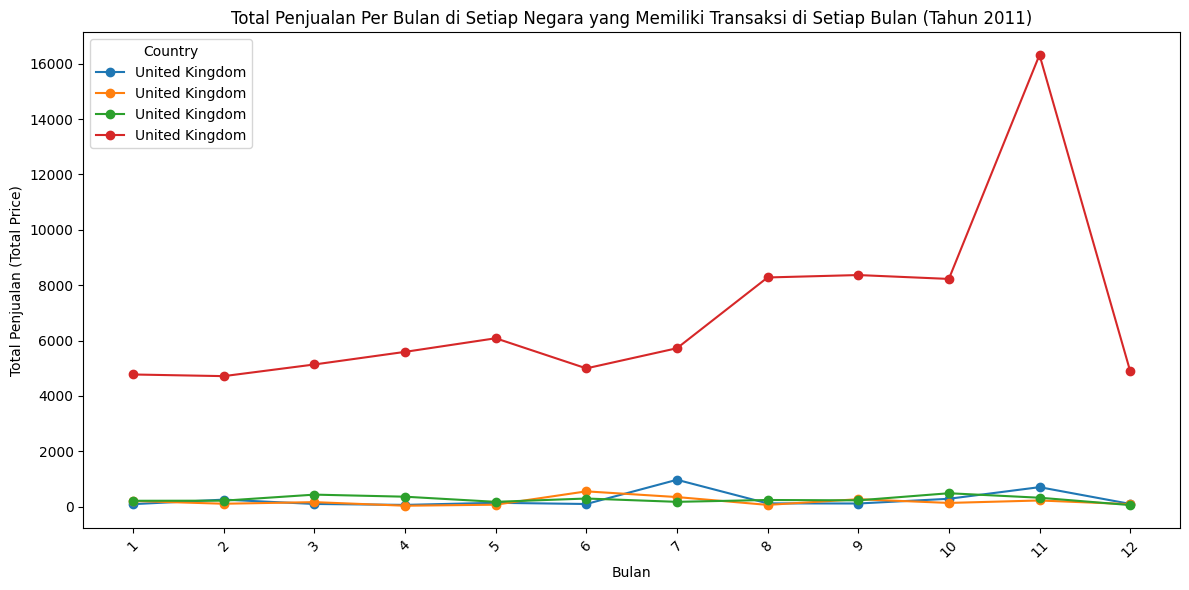

In [ ]:
# visualisasi
plt.figure(figsize=(12, 6))

# Menggunakan loop untuk menggambar grafik untuk setiap negara
for country in tabel_pivot_komplit.columns:
    plt.plot(tabel_pivot_komplit.index, tabel_pivot_komplit[country], label=negara, marker='o')

# Menambahkan label dan judul
plt.title('Total Penjualan Per Bulan di Setiap Negara yang Memiliki Transaksi di Setiap Bulan (Tahun 2011)')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (Total Price)')
plt.xticks(tabel_pivot_komplit.index, rotation=45)
plt.legend(title='Country')

# Menampilkan plot
plt.tight_layout()
plt.show()


1. Terdapat 4 negara yang setiap bulannya melakukan transaksi yaitu United Kingdom, France, Germany, EIRE.
2. Kalau kita hubungan dengan jumlah pelanggan uniknya (pertanyaan no.5), maka UK, France, dan Germany sama-sama menduduki peringkat 3 jumlah pelanggan terbanyak dan sama menduduki 3 negara dengan total penjualan terbanyak (negara yang konsisten ada transaksi setiap bulannya) artinya cukup linier antara jumlah pelanggan unik dengan total penjualannya. Namun berbeda dengan EIRE, EIRE hanya memiliki 3 pelanggan namun bisa konsisten melakukan transaksi setiap bulannya, namun tidak membuktikan bahwa EIRE merupakan negara ke-4 dengan total penjualan terbanyak dari semua negara, karena grafik ini hanya menunjukkan negara yang konsisten melakukan transaksi setiap bulannya, bisa jadi negara yang tidak konsisten setiap bulan punya kedudukan total penjualan yang lebih tinggi dari EIRE.

# 3. Lakukan analisa multivariate pada kolom numerikal berupa :
- Correlation Heatmap + insight / observation **(10 poin)**

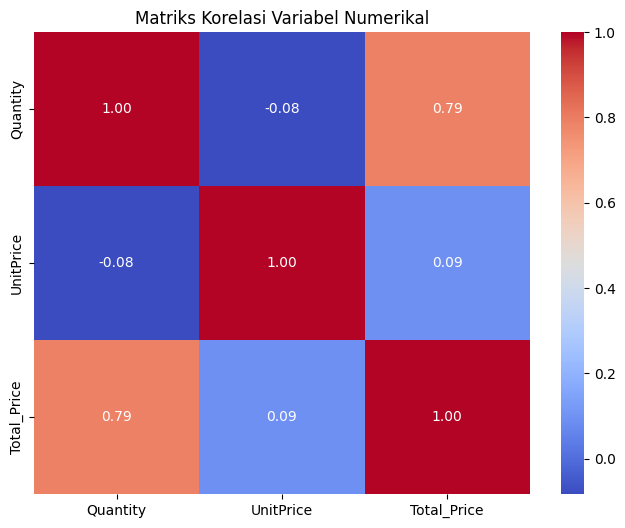

In [ ]:
# Menghitung korelasi antar kolom numerikal
correlation_matrix = data[['Quantity', 'UnitPrice', 'Total_Price']].corr()

# Menampilkan korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriks Korelasi Variabel Numerikal')
plt.show()

1. Total price dan Quantity memiliki korelasi positif yang tinggi satu sama lain. Banyaknya quantity yang dibeli pasti memengaruhi besarnya total price.
2. Unit Price dan Quantity memiliki korelasi negatif yang rendah/lemah (bertanda negatif dan nilai mendekati 0), ini berarti bahwa ketika harga per unit naik, jumlah barang yang terjual cenderung turun sedikit, atau sebaliknya, tetapi perubahan ini tidak begitu signifikan dan tidak terlalu kuat.
3. Heatmap korelasi dilakukan untuk data numerikal saja.
4. Pada dataset tertentu heatmap korelasi bisa dilakukan untuk data kategorikal, namun pada dataset ecommerce.csv ini data kategorikalnya tidak memungkinkan untuk di encoding karena nilai uniknya begitu banyak (InvoiceNo, CustomerID, Description, InvoiceDate, Country, StockCode)